# 그래프와 시각화
### matplotlib: 시각화 라이브러리
### seaborn: matplotlib 기반 고수준 시각화 도구 제공, pandas의 DataFrame 시각화

- plt.plottype(x=data1, y=data2)
- sns.plottype(data=df, x='x축 column', y='y축 column')
- data.plot.plottype(x='x축 column', y='y축 column')

matplotlib pyplot 모듈 활용
- figure 객체 생성: plt.figure(), figsize 옵션으로 크기 조정
- axes 객체 생성: 그래프 그리기

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 20
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)
np.random.seed(12345)


plt.style.use('default')
sns.set_style("whitegrid")

### figure 및 axes 객체 생성 -1

In [42]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [43]:
type(fig)

matplotlib.figure.Figure

fig.add_subplot(r, c, n): 전체 figure을 r, c로 나누었을 때 n번째 axes를 의미

In [44]:
ax1 = fig.add_subplot()

In [45]:
type(ax1)

matplotlib.axes._axes.Axes

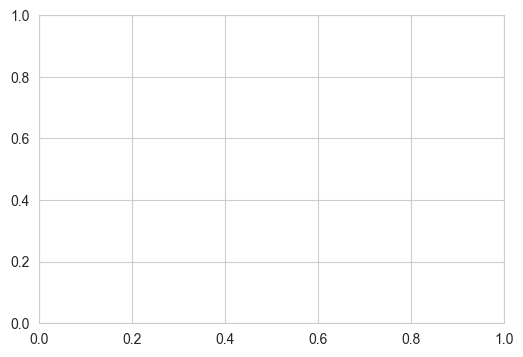

In [46]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()

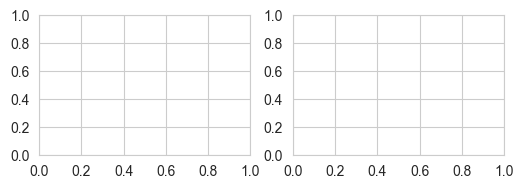

In [47]:
fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

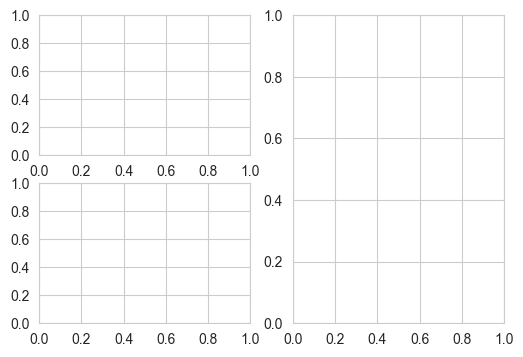

In [48]:
fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(1, 2, 2)

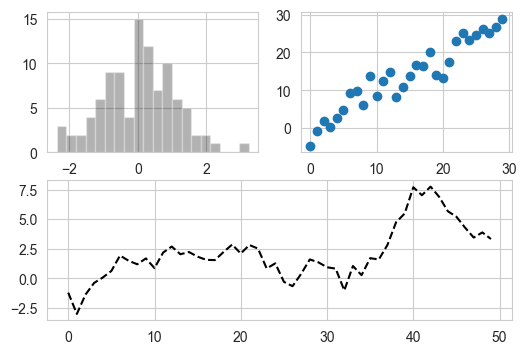

In [49]:
fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 1, 2)

ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed")

### figure 및 axes 객체 생성 -2

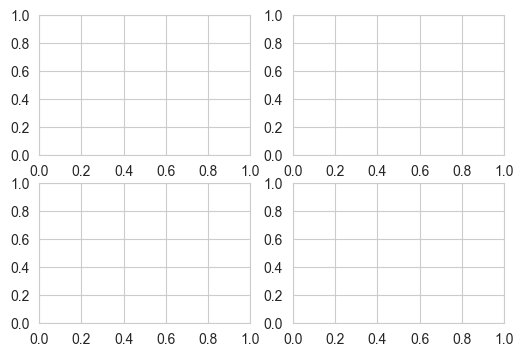

In [50]:
fig = plt.figure(figsize=(6, 4))
ax = fig.subplots(2, 2)

아래 두개의 그래프를 각각 plot한 두 개의 axes 객체를 (1,2) subplot을 갖는 figure에서 plot하시오 
- randn을 통해 만든 1000개의 데이터를 cumsum을 한 그래프 색깔은 검정색, dashed이고 label은＇black’
- 0~1000까지 변하는 정수 그래프, 빨간색, label은 ‘red’
- subplots의 옵션을 활용해서 두 subplot의 x 축눈금과 y축 눈금을 같게 하시오!
- 레전드를 나타내시오. 

matplotlib을 이용해서 subplot 그리기<br>
xticks, yticks 조절<br>
example -> 똑같이 그리시오

seaborn을 통해서 DataFrame 그리기 < 집중!!

#### matplotlib의 add_subplot / subplots 함수, DataFrame의 plot

<Axes: >

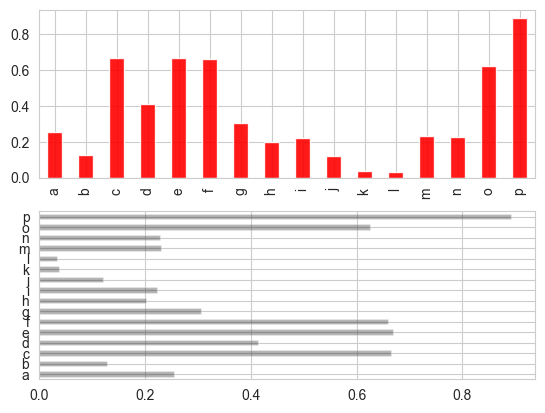

In [51]:
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))
# ax 옵션 이용 -> 그래프 위치 조정 가능
# ax=axes[0]: 0번 위치에 그래프를 그려라!!(seaborn에서도 똑같이 활용 가능)
data.plot.bar(ax=axes[0], color="red", alpha=0.9)
data.plot.barh(ax=axes[1], color="black", alpha=0.3)

In [52]:
tips = pd.read_csv("E:/학교/4-2/빅데이터분석/7주차/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [53]:
tips.shape

(244, 6)

In [54]:
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [55]:
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"], columns=[2, 3, 4, 5])
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


In [56]:
party_pcts = party_counts.div(party_counts.sum(axis="columns"), axis="index")
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


<Axes: xlabel='day'>

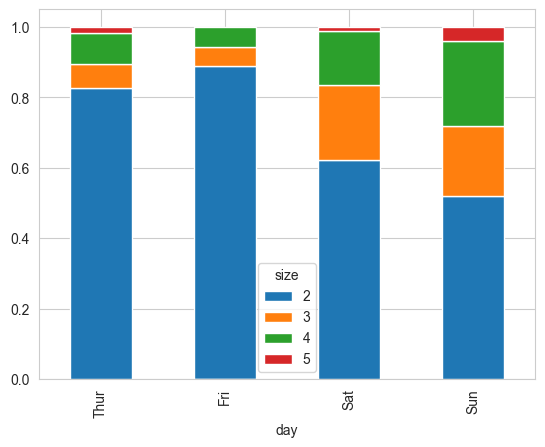

In [57]:
party_pcts.plot.bar(stacked=True)

In [58]:
tips["tip_pct"] = tips["tip"] / tips["total_bill"]
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


<Axes: xlabel='tip_pct', ylabel='day'>

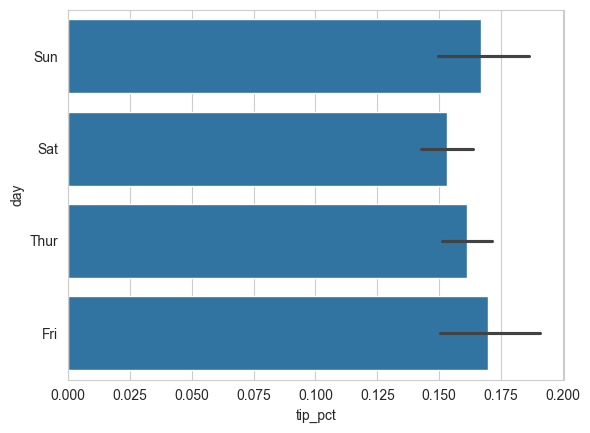

In [59]:
sns.barplot(data=tips, x="tip_pct", y="day", orient="h")
# 막대의 끝: 평균값, 95% 신뢰구간

### hue 옵션

In [60]:
tips["tip_pct"]

0      0.059447
1      0.160542
2      0.166587
3      0.139780
4      0.146808
         ...   
239    0.203927
240    0.073584
241    0.088222
242    0.098204
243    0.159744
Name: tip_pct, Length: 244, dtype: float64

In [61]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


<Axes: xlabel='day', ylabel='tip_pct'>

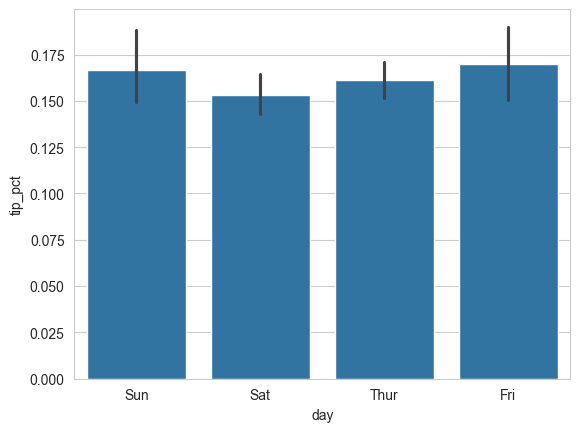

In [62]:
sns.barplot(y="tip_pct", x="day", data=tips)

<Axes: xlabel='day', ylabel='tip_pct'>

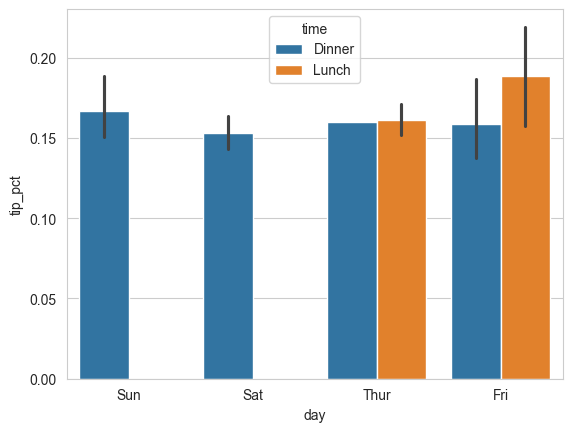

In [63]:
sns.barplot(y="tip_pct", x="day", data=tips, hue="time")

<Axes: xlabel='tip_pct', ylabel='total_bill'>

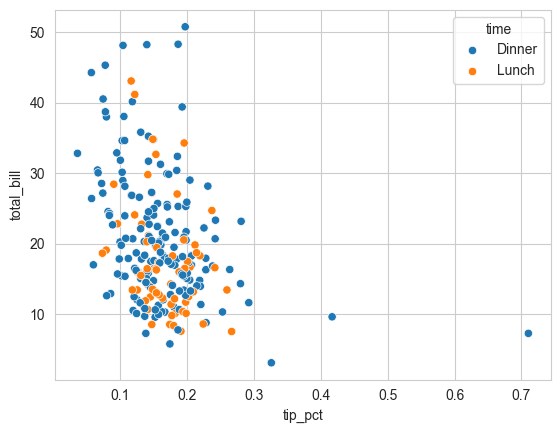

In [64]:
sns.scatterplot(x="tip_pct", y="total_bill", hue="time", data=tips)

## catplot: DataFrame의 활용도 높일 수 있음
여러 subplots를 row와 column 카테고리 기준에 따라 그림<br>
kinds 옵션을 통해 그래프 종류 결졍

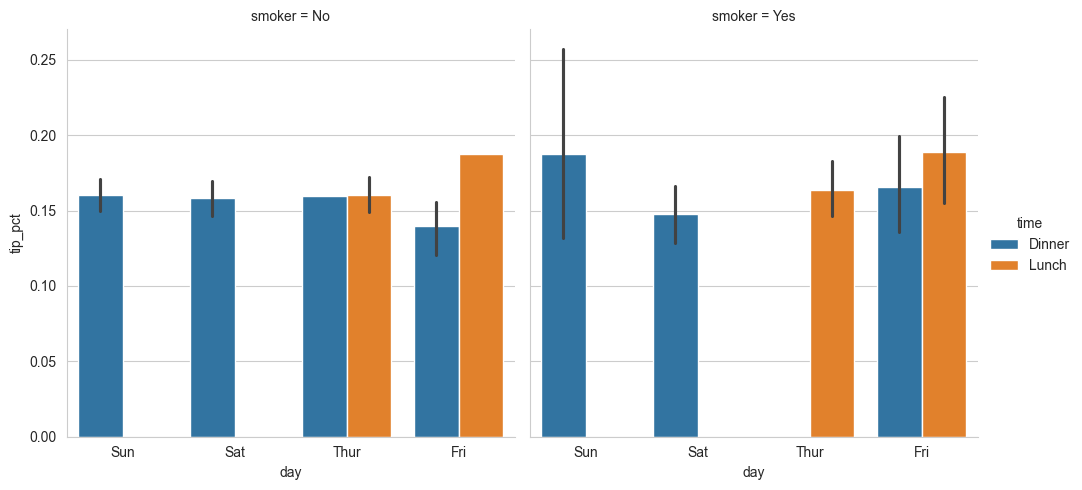

In [65]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker", kind="bar", data=tips[tips.tip_pct < 1])

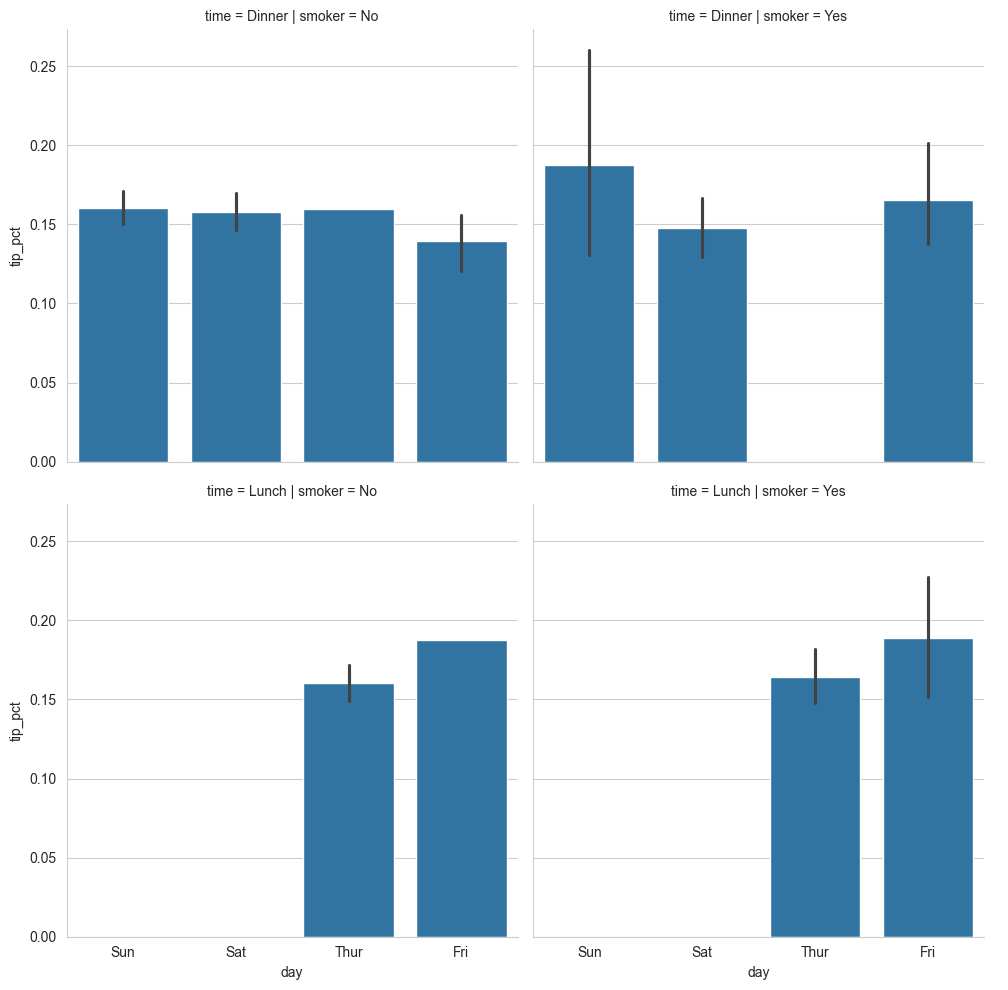

In [67]:
sns.catplot(x="day", y="tip_pct", row="time", col="smoker", kind="bar", data=tips[tips.tip_pct < 1])